In [1]:
# Plotting notebook from our Interfereometry measurement experiments

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
T0 =  22.5 # Initial temperature we read on 2/3 (I = 0.)
L = 6 # In nanometers -- this is just a guess
L = L * (10**7)

I = np.arange(0,0.5,0.1)
x = np.arange(10)
y = np.random.random(10)


In [8]:
# Read in data from our CSV file - Thermal Expansion in Google Docs
path = '/Users/andrewbowen/OpticsLab/Interferometry/data/'
data = pd.read_csv(path + 'Thermal-Expansion-Data.csv', sep = ',')

data

,I (A),T (C),T_err (+/-),Counts
0,0.0,22.5,0.1,0
1,0.1,24.3,0.1,6
2,0.2,29.5,0.1,133
3,0.3,37.7,0.1,289
4,0.4,48.2,0.1,403
5,0.5,60.3,0.1,610


In [9]:
# Setting up pandas series of each 
I = data['I (A)']
T = data['T (C)']
Terr = data['T_err (+/-)']
N = data['Counts']

In [10]:
def linModel(x,m,b):
    return m*x + b

def getDeltaL(n):
#     Function that takes in the # of counts and returns the path length (derivation was done in lab -check notebook)
#     factor of 8 refers to double length beam has to go: 2* deltaL = (lamba/4) * n 
    wavelength = 633 # in nanometers
    return (wavelength * n) / 8

# Getting deltaL values from our counts
deltaL = getDeltaL(N)

def linearFitPlot(x,y, title):
    # Fitting the curves
    fitCoeffs, fitCovariances = curve_fit(linModel, x, y)

    # Pick out the best-fit for the 'm' value and best-fit for the 'b' value
    bestfit_m = fitCoeffs[0] # This slope is related to coeff of thermal expansion
    bestfit_b = fitCoeffs[1]

    # Printing best-fit values to screen, bestfit_m is slope of linear fit, b is y-intercept
    print(f'best-fit value for \'m\': {bestfit_m}')
    print(f'best-fit value for \'b\': {bestfit_b}')
    
    bestfit_x = np.arange(np.max(x))
#     Define the y-values for the best-fit line, using the linModel function defined above
    bestfit_y = linModel(bestfit_x, bestfit_m, bestfit_b)
    
    # Plot your data (again) as red circles with error bars
    f,ax = plt.subplots(figsize=(8,5))
    ax.scatter(indices[1:],voltage[1:], c = 'r')
    ax.set_xlabel("T (C)", fontsize = 16)
    ax.set_ylabel("$\Delta$L", fontsize = 16)
    ax.set_title(title)


    # Overplot the best-fit line in blue (default color)
    ax.plot(bestfit_x, bestfit_y)

In [11]:
# Notice that curve_fit returns a tuple (of arrays)
fitCoeffs, fitCovariances = curve_fit(linModel, T, deltaL)

# Pick out the best-fit for the 'm' value and best-fit for the 'b' value
bestfit_m = fitCoeffs[0] # This slope is related to coeff of thermal expansion
bestfit_b = fitCoeffs[1]

# Printing best-fit values to screen, bestfit_m is slope of linear fit, b is y-intercept
print(f'best-fit value for \'m\': {bestfit_m}')
print(f'best-fit value for \'b\': {bestfit_b}')

best-fit value for 'm': 1279.7114995401482
best-fit value for 'b': -28452.780607947174


In [12]:
# Arrays for plotting line
bestfit_T = np.arange(0,65) # Temp can't go much above ~60 C
bestfit_L = linModel(bestfit_T, bestfit_m, bestfit_b) # Best-fit line for later, slope is coeff

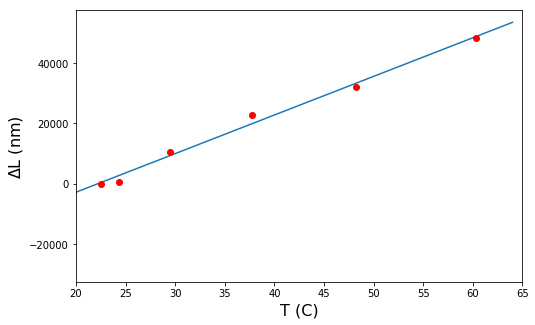

In [15]:
# Plot your data (again) as red circles with error bars
f,ax = plt.subplots(figsize=(8,5))
ax.errorbar(T, deltaL, xerr = Terr, fmt='ro',c = 'r')
ax.set_xlim([20,65])
ax.set_xlabel("T (C)", fontsize = 16)
ax.set_ylabel("$\Delta$L (nm)", fontsize = 16)

# Define the y-values for the best-fit line, using the linModel function defined above
bestfit_y = linModel(bestfit_T, bestfit_m, bestfit_b)

# Overplot the best-fit line in blue (default color)
ax.plot(bestfit_T, bestfit_L)

In [14]:
# slope of best fit line (or its reciprocal) divided by length of rod gives alpha
alpha = bestfit_m / L
print(f'The coeffictient of thermal expansion alpha is {alpha} ')

The coeffictient of thermal expansion alpha is 2.1328524992335805e-05 


In [ ]:
# Our alpha is close to the alpha for Aluminum (~24e-6)

# Change rate - different direction in current, longer wait times (re-run)
# Thermometer - can be insulated in how it's wired to slab

In [ ]:
# Ran confirmation test at the end of the 2/5 period.
data2 = pd.read_csv('./../data/Thermal-Expansion-Data.csv')

In [ ]:
newCounts = data2['Counts']
I2 = data2['I']
T2 = data2['T (C)']

newDeltaL = getDeltaL(newCounts)

In [ ]:
linearFitPlot(T2, newDeltaL)